In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np
import keras
from keras import layers


In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

--2021-02-04 16:03:34--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 64.233.170.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2021-02-04 16:03:35 (78.5 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [3]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [4]:
predictors.shape

(15462, 10)

In [5]:
# max_sequence_len demonstrates the max number of words in sentence
max_sequence_len-1

10

In [6]:
corpus[:15]

['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou, contracted to thine own bright eyes,',
 "feed'st thy light'st flame with self-substantial fuel,",
 'making a famine where abundance lies,',
 'thyself thy foe, to thy sweet self too cruel.',
 "thou that art now the world's fresh ornament",
 'and only herald to the gaudy spring,',
 'within thine own bud buriest thy content',
 'and, tender churl, makest waste in niggarding.',
 'pity the world, or else this glutton be,',
 "to eat the world's due, by the grave and thee.",
 'when forty winters shall beseige thy brow,']

In [8]:

model = keras.models.Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(layers.Bidirectional(layers.LSTM(256, return_sequences=True)))
model.add(layers.LSTM(128))
model.add(layers.Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy')


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 512)           731136    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               328192    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              414219    
Total params: 1,794,647
Trainable params: 1,794,647
Non-trainable params: 0
_________________________________________________________________


In [10]:
# where does the 484 in each epoch come from?
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 5s 10ms/step - loss: 6.8905 - accuracy: 0.0206
Epoch 2/100
484/484 [==============================] - 5s 10ms/step - loss: 6.4588 - accuracy: 0.0312
Epoch 3/100
484/484 [==============================] - 5s 10ms/step - loss: 6.2900 - accuracy: 0.0338
Epoch 4/100
484/484 [==============================] - 5s 10ms/step - loss: 6.1733 - accuracy: 0.0348
Epoch 5/100
484/484 [==============================] - 4s 9ms/step - loss: 6.0531 - accuracy: 0.0390
Epoch 6/100
484/484 [==============================] - 5s 10ms/step - loss: 5.9287 - accuracy: 0.0467
Epoch 7/100
484/484 [==============================] - 4s 9ms/step - loss: 5.7797 - accuracy: 0.0547
Epoch 8/100
484/484 [==============================] - 5s 10ms/step - loss: 5.6246 - accuracy: 0.0589
Epoch 9/100
484/484 [==============================] - 4s 9ms/step - loss: 5.4595 - accuracy: 0.0659
Epoch 10/100
484/484 [==============================] - 5s 9ms/step - loss: 5.2985 - 

484/484 [==============================] - 5s 10ms/step - loss: 0.5997 - accuracy: 0.8482
Epoch 82/100
484/484 [==============================] - 5s 10ms/step - loss: 0.5891 - accuracy: 0.8487
Epoch 83/100
484/484 [==============================] - 4s 9ms/step - loss: 0.5955 - accuracy: 0.8472
Epoch 84/100
484/484 [==============================] - 5s 11ms/step - loss: 0.5976 - accuracy: 0.8473
Epoch 85/100
484/484 [==============================] - 4s 9ms/step - loss: 0.5901 - accuracy: 0.8478
Epoch 86/100
484/484 [==============================] - 4s 9ms/step - loss: 0.5925 - accuracy: 0.8477
Epoch 87/100
484/484 [==============================] - 5s 10ms/step - loss: 0.5753 - accuracy: 0.8498
Epoch 88/100
484/484 [==============================] - 4s 9ms/step - loss: 0.5603 - accuracy: 0.8511
Epoch 89/100
484/484 [==============================] - 5s 10ms/step - loss: 0.5510 - accuracy: 0.8528
Epoch 90/100
484/484 [==============================] - 4s 9ms/step - loss: 0.5546 - accur

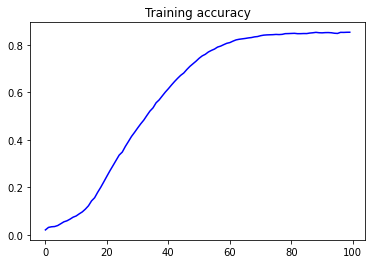

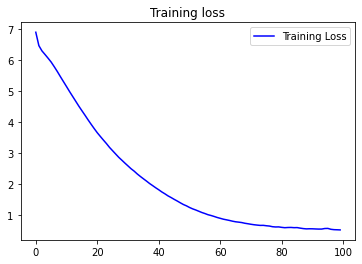

In [11]:
#couldn't get it to work

import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()


The accuracy and loss plots are starting to look better.

In [12]:
#couldn't get it to work
#outcome of the seed text without - with learning rate chosen for Adam optimizer 
seed_text = "love thy foe as thy sweet not cruel"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

love thy foe as thy sweet not cruel now i sing yet me so great can ' ' ' ' so part ' ' lend tongue blind grow old days ' than it more delight than bears thee memory thee to spend grow dumb shall sing so true thee well ' i i fever find be ' are my tongue ' ' ' to me ' nearly i taste of me unused freedom thee of all men woe sport gone bright to spend near slain see thee thee back again now proud of sense before true needing more skill new ' are keep me ill ' ' to


The generated text is not bad although it talks about men,their freedom,and old memory, etc.So it did not yield words to fit the 'love your enemy' context in the seed text.

Tried with a Bidirectional LSTM Layer. The accuracy started to hit 80% and above since 59 epochs.

The accuracy jumped to 85% using the bidirectional layer compared to the 83% achieved using 3 LSTM layers. Also the loss went down from to 0.7% to 0.5% This direction looks good.